# [Thực hành] Chuẩn hoá dữ liệu với Z-Score Scaling

1. Khai báo thư viện cần dùng


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# khởi tạo dữ liệu
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
df

,beta,exponential,normal_p,normal_l
0,56.692138,17.684246,13.629713,-5.315276
1,34.360735,1.463840,13.924065,17.729556
2,56.365543,2.953260,9.558921,19.488891
3,50.499546,0.208963,9.768095,-1.777816
4,58.347447,4.682252,13.319061,10.811674
...,...,...,...,...
995,47.000199,6.753136,10.551127,-3.630133
996,49.552287,23.281417,9.312725,10.467361
997,57.760460,2.509964,6.146151,9.769013
998,55.225861,5.069355,10.113771,0.985751


In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [5]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,56.692138,17.684246,13.629713,-5.315276,14.762403
1,34.360735,1.463840,13.924065,17.729556,23.117154
2,56.365543,2.953260,9.558921,19.488891,21.634669
3,50.499546,0.208963,9.768095,-1.777816,16.635767
4,58.347447,4.682252,13.319061,10.811674,19.292431


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   beta         1000 non-null   float64
 1   exponential  1000 non-null   float64
 2   normal_p     1000 non-null   float64
 3   normal_l     1000 non-null   float64
 4   bimodal      1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


2. Trực quan hóa dữ liệu sinh ra

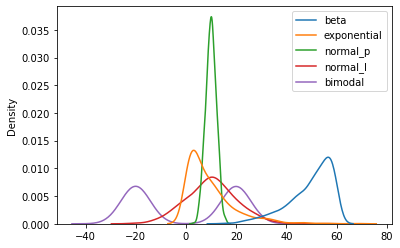

In [7]:
sns.kdeplot(data=df)

In [8]:
# Hiển thị thống kê dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.707640,9.503193,9.986067,10.067685,-0.044777
std,8.758918,9.593314,2.115184,10.105925,20.242990
min,15.108347,0.012198,3.079842,-22.080893,-30.161907
25%,44.924984,2.803007,8.567049,3.756472,-20.010856
50%,51.849044,6.486380,10.034207,10.122787,-0.443981
75%,56.598175,12.928578,11.410118,16.427616,19.946572
max,59.973207,68.587087,16.096150,55.162872,29.301809


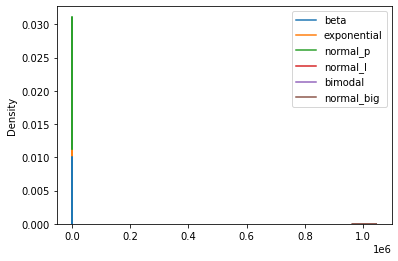

In [9]:
# Thêm một đặc trưng với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

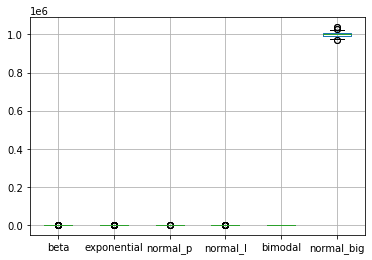

In [10]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [11]:
# Chuẩn hóa với StandardScaler (Z-Score scaling)
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [12]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sách cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [13]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.797815,0.853214,1.723476,-1.522934,0.731838,0.295674
1,-1.753023,-0.838436,1.862707,0.758536,1.144768,1.355321
2,0.760509,-0.683102,-0.202044,0.932712,1.071497,-0.056076
3,0.090457,-0.969308,-0.103103,-1.172721,0.824428,-0.476943
4,0.986895,-0.502783,1.576535,0.073656,0.955732,-0.200523


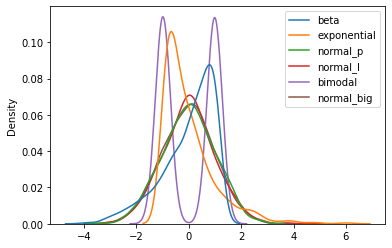

In [14]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [15]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.324807e-16,-7.116530e-17,-4.554135e-16,2.382539e-16,-7.365220e-16,2.425837e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.952155e+00,-9.898294e-01,-3.266704e+00,-3.182753e+00,-1.488525e+00,-3.120688e+00
25%,-5.463059e-01,-6.987719e-01,-6.712079e-01,-6.248188e-01,-9.868142e-01,-6.817429e-01
50%,2.446050e-01,-3.146277e-01,2.277064e-02,5.455160e-03,-1.973050e-02,3.578282e-02
75%,7.870816e-01,3.572383e-01,6.735883e-01,6.296419e-01,9.880631e-01,6.557520e-01
max,1.172600e+00,6.161944e+00,2.890122e+00,4.464485e+00,1.450441e+00,3.769001e+00


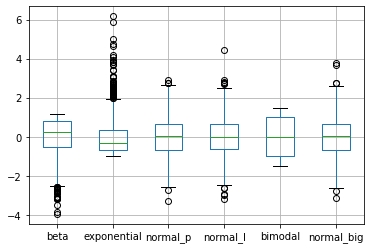

In [16]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()